In [9]:
import numpy as np
import matplotlib.pyplot as plt
import audacity
import TransferFunctions as tf
import SoundUtils as sut
import scipy.signal as sig
import peakutils

%matplotlib notebook

In [10]:
rpmvals = ['4050','4250','4500','4750','5000']
sensitivity = 0.000316
runs = 3

dfiles = []
for rpm in rpmvals:
    for r in range(runs):
        dfiles.append('DATA/MAIN_4500rpm/calibration/trill/%srpm_%d.aup'%(rpm,r))
#         dfiles.append('DATA/MAIN_4500rpm/calibration/cross/%srpm_%d.aup'%(rpm,r))

In [11]:
dfiles

['DATA/MAIN_4500rpm/calibration/trill/4050rpm_0.aup',
 'DATA/MAIN_4500rpm/calibration/trill/4050rpm_1.aup',
 'DATA/MAIN_4500rpm/calibration/trill/4050rpm_2.aup',
 'DATA/MAIN_4500rpm/calibration/trill/4250rpm_0.aup',
 'DATA/MAIN_4500rpm/calibration/trill/4250rpm_1.aup',
 'DATA/MAIN_4500rpm/calibration/trill/4250rpm_2.aup',
 'DATA/MAIN_4500rpm/calibration/trill/4500rpm_0.aup',
 'DATA/MAIN_4500rpm/calibration/trill/4500rpm_1.aup',
 'DATA/MAIN_4500rpm/calibration/trill/4500rpm_2.aup',
 'DATA/MAIN_4500rpm/calibration/trill/4750rpm_0.aup',
 'DATA/MAIN_4500rpm/calibration/trill/4750rpm_1.aup',
 'DATA/MAIN_4500rpm/calibration/trill/4750rpm_2.aup',
 'DATA/MAIN_4500rpm/calibration/trill/5000rpm_0.aup',
 'DATA/MAIN_4500rpm/calibration/trill/5000rpm_1.aup',
 'DATA/MAIN_4500rpm/calibration/trill/5000rpm_2.aup']

In [12]:
# plt.figure()
amplitude = []
pressure = []
for file in dfiles:
    auf = audacity.Aup(file)
    sr = auf.rate
    data = auf.get_channel_data(0)[int(5*sr):]
    ann = auf.get_annotation_data()[0]['label']
    maxargs = peakutils.indexes(data, thres=0.8, min_dist=0.005*sr)
    maxvals = [data[m] for m in maxargs]
    minargs = peakutils.indexes(np.negative(data), thres=0.8, min_dist=0.005*sr)
    minvals = [data[n] for n in minargs]
    meanmax = np.mean(maxvals)
    meanmin = np.mean(minvals)
#     plt.plot(data)
#     plt.plot(minargs, minvals)
    App = meanmax-meanmin
    print(App)
    Vpp = float(ann)
    Pa = Vpp/sensitivity
    amplitude.append(App)
    pressure.append(Pa)
    
# amplitude = sorted(amplitude)
# pressure = sorted(pressure)

0.0325288
0.0312444
0.0320526
0.0366914
0.0357295
0.0338562
0.0395947
0.0379884
0.0386836
0.0436894
0.0429845
0.0458858
0.051585
0.0496382
0.0519289


In [13]:
(ar,br) = np.polyfit(amplitude,pressure,1)
yr = np.polyval([ar,br],amplitude)
err = np.sqrt(sum((yr-pressure)**2)/len(pressure))

<IPython.core.display.Javascript object>


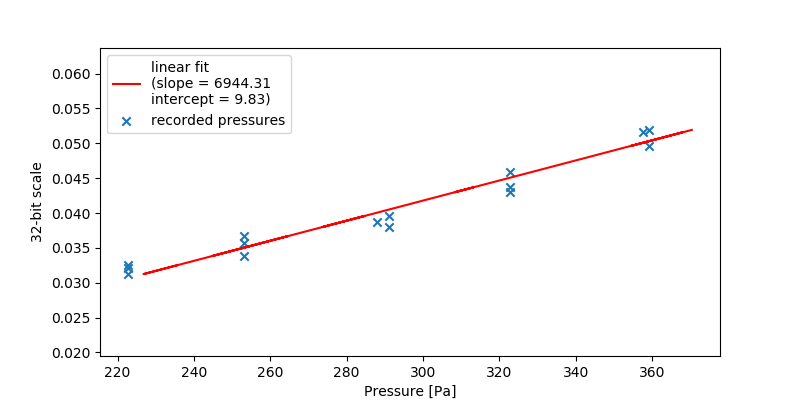

Text(0,0.5,'32-bit scale')

In [14]:
plt.figure(figsize=(8,4))
plt.scatter(pressure, amplitude, marker='x')
# plt.plot(pressure, amplitude)
plt.plot(yr, amplitude, c='r')
plt.legend(('linear fit \n(slope = %.2f \nintercept = %.2f)' %(ar,br), 'recorded pressures'))
plt.xlabel('Pressure [Pa]')
plt.ylabel('32-bit scale')

<IPython.core.display.Javascript object>


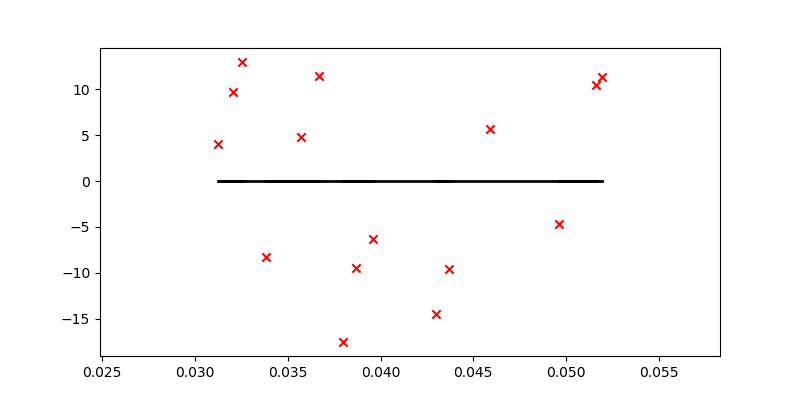

In [15]:
plt.figure('Residuals', figsize=(8,4))
plt.scatter(amplitude, yr-pressure, c='r', marker='x')
plt.plot(amplitude, np.zeros(len(amplitude)), 'k', linewidth='2')